In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt

/home/gianluca/.virtualenvs/bayes/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [2]:
goalies = pd.read_csv('./goalie.csv')
goalies.columns = [column.lower() for column in goalies.columns]
goalies['rnk'] = list(range(goalies.shape[0]))
goalies.head()

,name,team,gp,gs,min,w,l,otl,ega,ga,gaa,sa,sv,svpct,so,rnk
0,Sergei Bobrovsky,COB,37,37,2157,28,7,2,3,71,1.98,1050,979,0.932,3,0
1,Devan Dubnyk,MIN,36,36,2167,25,8,3,0,69,1.91,1059,990,0.935,5,1
2,Martin Jones,SAN,41,41,2419,25,14,2,5,90,2.23,1085,995,0.917,2,2
3,Cam Talbot,EDM,43,43,2589,24,12,7,2,104,2.41,1289,1185,0.919,3,3
4,Braden Holtby,WAS,37,37,2169,23,8,4,2,71,1.96,1007,936,0.929,6,4


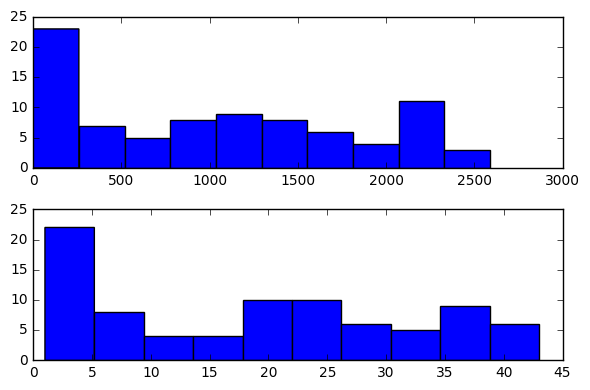

In [3]:
plt.subplot(211)
plt.hist(goalies['min'])
plt.subplot(212)
plt.hist(goalies.gp)
plt.tight_layout()
plt.show()

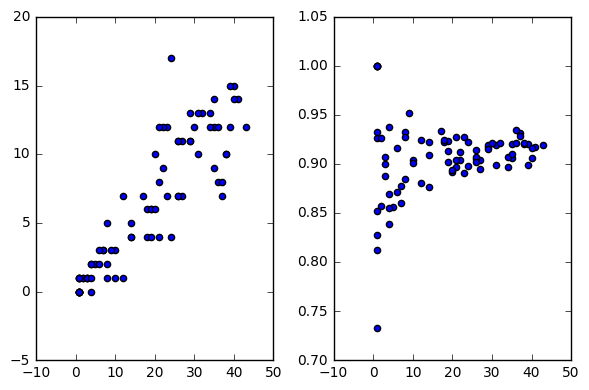

In [4]:
plt.subplot(121)
plt.scatter(goalies.gp, goalies.l)
plt.subplot(122)
plt.scatter(goalies.gp, goalies.svpct)
plt.tight_layout()
plt.show()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cd5cec9a9b5fc442749f6758757bec1d NOW.


Inference for Stan model: anon_model_cd5cec9a9b5fc442749f6758757bec1d.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]    0.92  8.9e-5 6.9e-3   0.91   0.92   0.92   0.93   0.94   6000    1.0
theta[1]    0.93  8.8e-5 6.8e-3   0.91   0.92   0.93   0.93   0.94   6000    1.0
theta[2]    0.91  9.4e-5 7.3e-3    0.9   0.91   0.91   0.92   0.93   6000    1.0
theta[3]    0.91  8.7e-5 6.8e-3    0.9   0.91   0.91   0.92   0.93   6000    1.0
theta[4]    0.92  9.3e-5 7.2e-3   0.91   0.92   0.92   0.93   0.93   6000    1.0
theta[5]    0.91  9.7e-5 7.5e-3    0.9   0.91   0.91   0.92   0.93   6000    1.0
theta[6]    0.91  9.5e-5 7.4e-3    0.9   0.91   0.91   0.92   0.93   6000    1.0
theta[7]     0.9  1.0e-4 8.0e-3   0.89    0.9    0.9   0.91   0.92   6000    1.0
theta[8]    0.91 10.0e-5 7.7e-3    0.9   0.91   0.91   0.92   0.93   6000    1.0
t

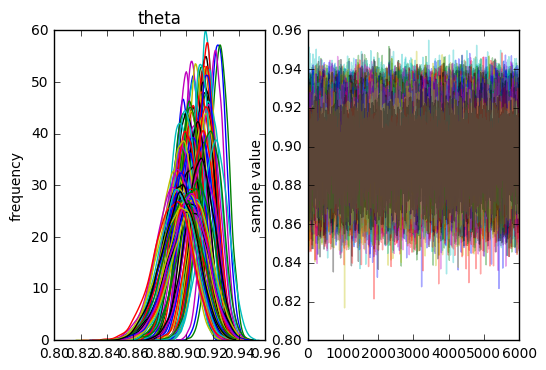

In [5]:
data = {
    'players': goalies.shape[0],
    'player': goalies.rnk.values,
    'shots': goalies.sa.values,
    'saves': goalies.sv.values,
    'alpha': 360,
    'beta': 40
}

fit = pystan.stan(file='goalie.stan', data=data,
                  iter=3000, chains=4)
print(fit)
fit.plot()
plt.show()

In [6]:
goalies[goalies.gp > 30].head(15)

,name,team,gp,gs,min,w,l,otl,ega,ga,gaa,sa,sv,svpct,so,rnk
0,Sergei Bobrovsky,COB,37,37,2157,28,7,2,3,71,1.98,1050,979,0.932,3,0
1,Devan Dubnyk,MIN,36,36,2167,25,8,3,0,69,1.91,1059,990,0.935,5,1
2,Martin Jones,SAN,41,41,2419,25,14,2,5,90,2.23,1085,995,0.917,2,2
3,Cam Talbot,EDM,43,43,2589,24,12,7,2,104,2.41,1289,1185,0.919,3,3
4,Braden Holtby,WAS,37,37,2169,23,8,4,2,71,1.96,1007,936,0.929,6,4
5,Tuukka Rask,BOS,39,39,2222,22,12,4,3,78,2.11,974,896,0.920,5,5
6,Carey Price,MON,35,35,2082,21,9,5,1,82,2.36,1020,938,0.920,2,6
7,Henrik Lundqvist,NYR,35,33,1944,21,12,1,1,89,2.75,948,859,0.906,2,7
8,Peter Budaj,LOS,40,38,2272,20,14,3,8,81,2.14,970,889,0.916,4,8
9,Frederik Andersen,TOR,38,38,2270,20,10,8,1,99,2.62,1230,1131,0.920,2,9


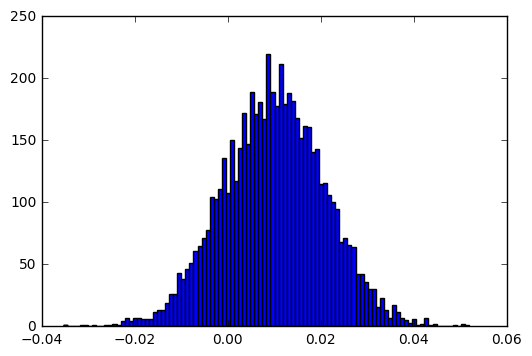

In [7]:
price = fit.extract(permuted=True)['theta'][:, 6]
lundqvist = fit.extract(permuted=True)['theta'][:, 7]

difference = price - lundqvist
plt.hist(difference, bins=100)
plt.show()

In [8]:
np.mean(difference>0)

0.8115

In [9]:
goalies[goalies.name == 'Antti Raanta']

,name,team,gp,gs,min,w,l,otl,ega,ga,gaa,sa,sv,svpct,so,rnk
33,Antti Raanta,NYR,18,15,915,10,4,0,2,34,2.23,443,409,0.923,2,33


In [10]:
raanta = fit.extract(permuted=True)['theta'][:, 33]

difference = lundqvist - raanta
np.mean(difference>0)


0.25666666666666665